# Fire Pulse Analysis
**Synopsis:** This python notebook will read in fire pulse data for processing and analysis.

**Description:** Fire pulse data taken from various tests will be processed and analyzed to show the similarity of the characteristics of fire pulse from the Navy Safety Fire Set firing into a LEEFI or CVR compared to the NAWC FTSA when firing into a CVR for qualification and acceptance testing. Five fire pulses will be analyzed.  All the fire pulses were taken at ambient temperature. These are:
- FIRE 800V: The highest stimulus successful fire pulse from the Neyer tests.
- FIRE 720V: The lowest stimulus successful fire pulse from the Neyer tests.
- CP 1000V: not sure
- RING 1000V: NSFS ring down into CVR
- FTSA Fire Pulse: A sample of the FTSA fire pulse taken during acceptance testing.

**Introduction:**

**Scope:**

**Analysis method:**


# Python code
[Python](https://en.wikipedia.org/wiki/Python_(programming_language) is a widely used high-level programming language for general-purpose programming, created by Guido van Rossum and first released in 1991. An interpreted language, Python has a design philosophy that emphasizes code readability (notably using whitespace indentation to delimit code blocks rather than curly brackets or keywords), and a syntax that allows programmers to express concepts in fewer lines of code than might be used in languages such as C++ or Java. The language provides constructs intended to enable writing clear programs on both a small and large scale.  Python features a dynamic type system and automatic memory management and supports multiple programming paradigms, including object-oriented, imperative, functional programming, and procedural styles. It has a large and comprehensive standard library.

## Load some python modules
These modules are from the [SciPy](https://en.wikipedia.org/wiki/SciPy) open source Python library.  [SciPy](https://www.scipy.org/) (pronounced "Sigh Pie") is an open source Python library used for scientific computing and technical computing. SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.  SciPy builds on the NumPy array object and is part of the NumPy stack which includes tools like Matplotlib, pandas and SymPy, and an expanding set of scientific computing libraries. This NumPy stack has similar users to other applications such as MATLAB, GNU Octave, and Scilab. The NumPy stack is also sometimes referred to as the SciPy stack.

In [1]:
import os
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

## Load fire pulse data from files
Fire pulse data was previously sliced from much longer data sets and saved to files.  Here only the main pulse is loaded.

In [68]:
df1 = pd.read_pickle('FIRE_800V.pkl')
df2 = pd.read_pickle('FIRE_720V.pkl')
df3 = pd.read_pickle('FTSA Fire Pulse.pkl')
df4 = pd.read_pickle('RING_1000V.pkl')
df5 = pd.read_pickle('CP_1000V.pkl')

## Normalize and time align the data
- normalize data to 1
- convert time base to nsec
- time align peak to t=0

In [69]:
# FIRE 800V
x1 = df1['Time'].values
y1 = df1['Voltage'].values
y1 = y1/y1.max()
x1 *= 1e9
y1_peak_index = y1.argmax()
x1 -= x1[y1_peak_index]

In [70]:
# FIRE 720V
x2 = df2['Time'].values
y2 = df2['Voltage'].values
y2 = y2/y2.max()
x2 *= 1e9
y2_peak_index = y2.argmax()
x2 -= x2[y2_peak_index]

In [71]:
# FTSA Fire Pulse
x3 = df3['Time'].values
y3 = df3['Voltage'].values
y3 = y3/y3.max()
y3_peak_index = y3.argmax()
x3 -= x3[y3_peak_index]
#x3[:] -= x3[0]  #start time at zero
#x3 += 88 #shift by 8 ns

In [72]:
#RING 1000V
x4 = df4['Time'].values
y4 = df4['Current'].values
y4 = y4/y4.max()
x4 *= 1e9
y4_peak_index = y4.argmax()
x4 -= x4[y4_peak_index]

In [73]:
#CP 1000V
x5 = df5['Time'].values
y5 = df5['Voltage'].values
y5 = y5/y5.max()
x5 *= 1e9
y5_peak_index = y5.argmax()
x5 -= x5[y5_peak_index]

## Plot the data

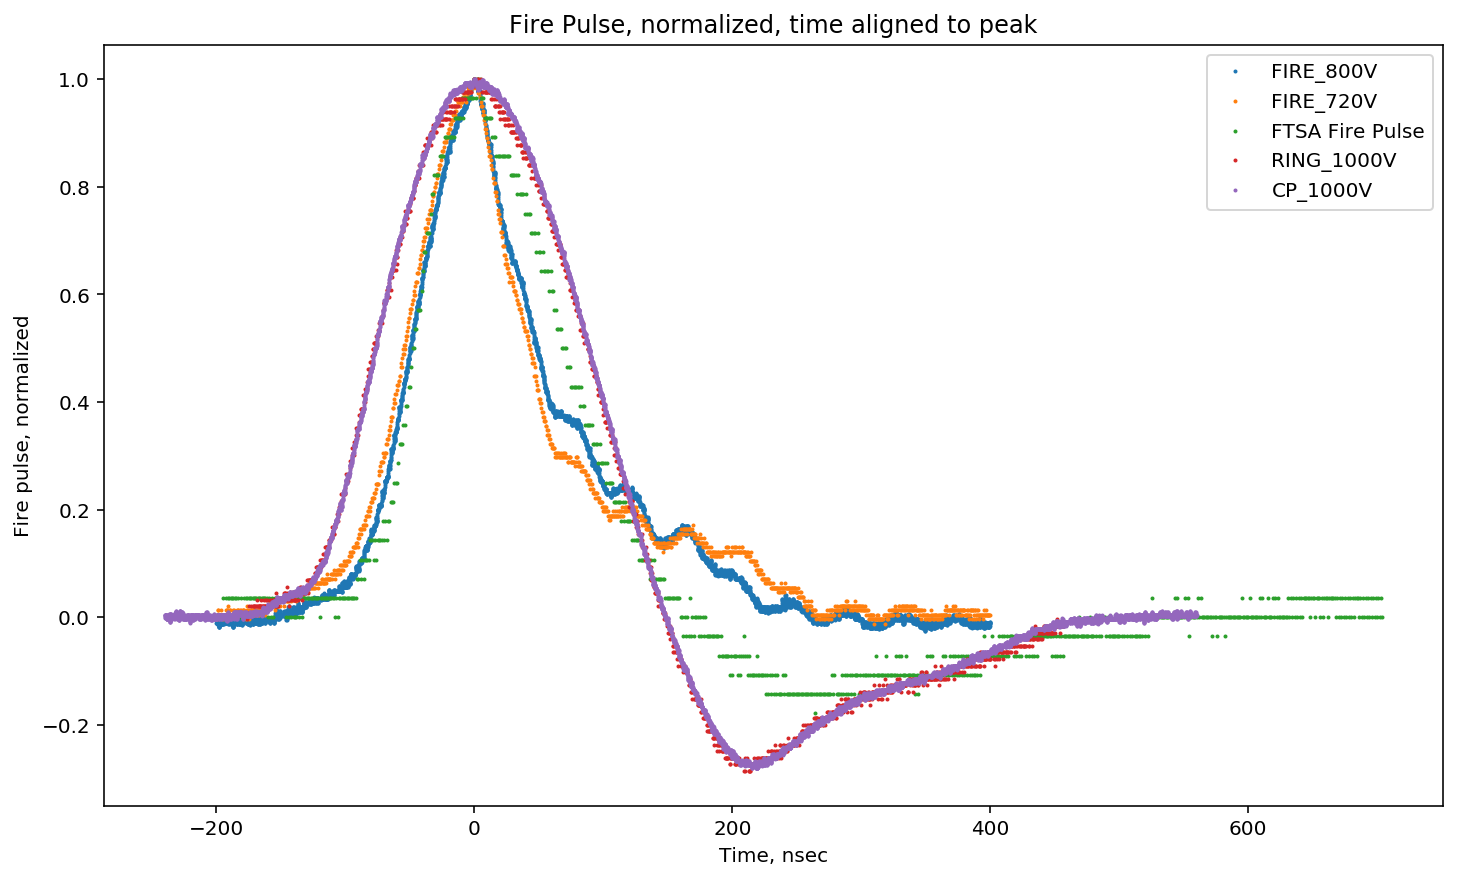

In [74]:
# plot the fire pulse
plt.plot(x1,y1,'o', markersize=1)
plt.plot(x2,y2,'o', markersize=1)
plt.plot(x3,y3,'o', markersize=1)
plt.plot(x4,y4,'o', markersize=1)
plt.plot(x5,y5,'o', markersize=1)
plt.xlabel('Time, nsec')
plt.ylabel('Fire pulse, normalized')
plt.legend(['FIRE_800V', 'FIRE_720V', 'FTSA Fire Pulse', 'RING_1000V', 'CP_1000V'], loc='best')
plt.title('Fire Pulse, normalized and time aligned to peak')
plt.show()

Comments:  The RING_1000V and CP_1000V data have a different shape compared to the fire pulse into a LEEFI (FIRE_800V and FIRE_720V) or the pulse into a CVR.

## Plotting only the leading edge of the fire pulses

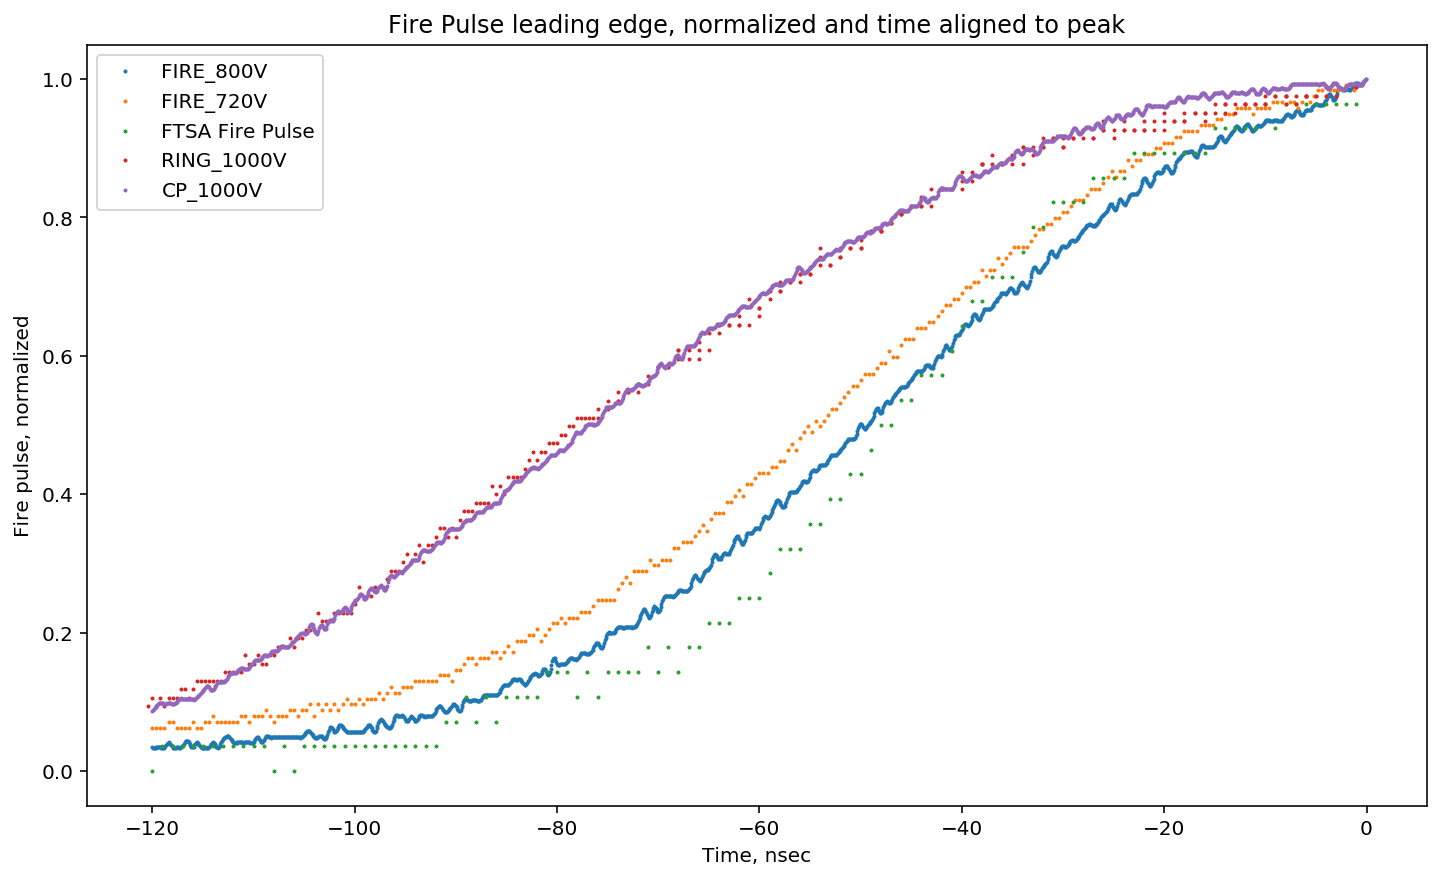

In [108]:
# plot the fire pulse
plt.plot(x1[y1_peak_index-1500:y1_peak_index],y1[y1_peak_index-1500:y1_peak_index],'o', markersize=1)
plt.plot(x2[y2_peak_index-300:y2_peak_index],y2[y2_peak_index-300:y2_peak_index],'o', markersize=1)
plt.plot(x3[y3_peak_index-120:y3_peak_index],y3[y3_peak_index-120:y3_peak_index],'o', markersize=1)
plt.plot(x4[y4_peak_index-300:y4_peak_index],y4[y4_peak_index-300:y4_peak_index],'o', markersize=1)
plt.plot(x5[y5_peak_index-1500:y5_peak_index],y5[y5_peak_index-1500:y5_peak_index],'o', markersize=1)
plt.xlabel('Time, nsec')
plt.ylabel('Fire pulse, normalized')
plt.legend(['FIRE_800V', 'FIRE_720V', 'FTSA Fire Pulse', 'RING_1000V', 'CP_1000V'], loc='best')
plt.title('Fire Pulse leading edge, normalized and time aligned to peak')
plt.show()

## Compare rise time and peak currents

OLD CODE BELOW HERE
-------------------

In [7]:
len(csv1)

25000

In [8]:
time = csv1[3].values
time = time.astype(float)
voltage = csv1[4].values
voltage = voltage.astype(float)

In [9]:
print('number of points in the data set: {:,d}'.format(len(voltage)))
print('peak voltage: {:.3f}'.format(voltage.max()))

number of points in the data set: 25,000
peak voltage: 1.060


### Find the offset voltage.
From the peak time t, find the averge from t-300 to t-200.

In [5]:
peak_index = voltage.argmax()
start = peak_index-300
end = peak_index-200
x = time[start:end]
y = voltage[start:end]
offset= y.mean()
print('voltage offset: {:.3f} volts'.format(offset))

In [6]:
# plot base line data, pre pulse, with offset
plt.plot(x,y,'ro', markersize=4)
plt.xlabel('Time, nsec')
plt.ylabel('Voltage')
plt.legend(['data'], loc='best')
plt.show()

In [7]:
start = peak_index-200
end = peak_index+700
x = time[start:end]
y = voltage[start:end]
y -= offset  #remove the offset

A [Savitzky–Golay](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter) filter is a digital filter that can be applied to a set of digital data points for the purpose of smoothing the data, that is, to increase the signal-to-noise ratio without greatly distorting the signal. This is achieved, in a process known as convolution, by fitting successive sub-sets of adjacent data points with a low-degree polynomial by the method of linear least squares. When the data points are equally spaced, an analytical solution to the least-squares equations can be found, in the form of a single set of "convolution coefficients" that can be applied to all data sub-sets, to give estimates of the smoothed signal, (or derivatives of the smoothed signal) at the central point of each sub-set. The method, based on established mathematical procedures, was popularized by Abraham Savitzky and Marcel J. E. Golay who published tables of convolution coefficients for various polynomials and sub-set sizes in 1964.

In [8]:
ynew = savgol_filter(y, 51, 3)  # filter the data

In [9]:
# plot the fire pulse
plt.plot(x,y,'ro', markersize=1)
plt.plot(x,ynew)
plt.xlabel('Time, nsec')
plt.ylabel('fire pulse, volts')
plt.legend(['data','Savitzky–Golay curve fit'], loc='best')
plt.show()

### find the following:
1. peak voltage
2. average pre pulse voltage level
3. index of 90% of peak
4. find 10% index
5. calculate rise time
6. calculate peak current

In [10]:
peak = y.max()
peak_index = y.argmax()+5
print('peak voltage: {:.3f}'.format(peak))
print('index of peak: {:.3f}'.format(peak_index))

#### limit data set to index of peak

In [11]:
x1 = x[50:peak_index]-x[50]
y1 = y[50:peak_index]

# plot the fire pulse
y1new = savgol_filter(y1, 51, 3)
plt.plot(x1,y1,'ro', markersize=1)
plt.plot(x1,y1new)
plt.xlabel('Time, nsec')
plt.ylabel('fire pulse, volts')
plt.legend(['data','Savitzky–Golay curve fit'], loc='best')
plt.show()

#### find rise time

In [14]:
index_90pc = (np.abs(y1new-y1new.max()*0.9)).argmin()
index_10pc = (np.abs(y1new-y1new.max()*0.1)).argmin()
rise_time = x1[index_90pc]-x1[index_10pc]

print('peak voltage value: {:.3f} volts'.format(y1new.max()))
print('90% voltage value: {:.3f} volts at {:.0f} ns'.format(y1new[index_90pc], x1[index_90pc]))
print('10% voltage value: {:.3f} volts at {:.0f} ns'.format(y1new[index_10pc], x1[index_10pc]))
print('rise time: {:.0f} ns'.format(rise_time))

#### plot the 90% and 10% data points

In [15]:
# plot the fire pulse
plt.plot(x1,y1,'ro', markersize=1)
plt.plot(x1,y1new)
plt.plot(x1[index_90pc],y1new[index_90pc],'X',markersize=15)  # 90% point
plt.plot(x1[index_10pc],y1new[index_10pc],'X',markersize=15)  # 10% point
plt.xlabel('Time, nsec')
plt.ylabel('fire pulse, volts')
plt.legend(['data','Savitzky–Golay curve fit','90%','10%'], loc='best')
plt.show()

CVR: R1 = 0.5143, R2 = 0.004907

In [19]:
R1 = 0.5143
R2 = 0.004907
print('peak current: {:,.0f} amps'.format(peak/R2))
print('peak voltage across the CVR: {:,.0f} volts'.format((R1+R2)*peak/R2))